In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
# 데이터셋 인스턴스 생성

df = pd.read_csv(r"C:\ai_class\week13\AAME.csv")  # CSV 파일 경로
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.00,4.05,3.85,3.85,3.213167,15000
1,1980-03-18,0.00,4.00,3.80,3.80,3.171437,10200
2,1980-03-19,0.00,4.05,3.85,3.85,3.213167,33500
3,1980-03-20,0.00,4.00,3.80,3.80,3.171437,8700
4,1980-03-21,0.00,3.95,3.75,3.75,3.129709,12700
...,...,...,...,...,...,...,...
10093,2020-03-26,2.29,2.29,2.08,2.28,2.280000,1600
10094,2020-03-27,2.25,2.25,2.21,2.25,2.250000,500
10095,2020-03-30,2.25,2.25,2.13,2.13,2.130000,400
10096,2020-03-31,2.11,2.11,2.11,2.11,2.110000,300


In [19]:
feature_cols = ['Open', 'High', 'Low', 'Close']
target_col   = ['Open']
data_X = df[feature_cols].values   # shape = (전체샘플수, 4)
data_y = df[target_col].values     # shape = (전체샘플수, 1)

In [20]:
data_X

array([[3.79999995, 3.79999995, 3.79999995, 3.79999995],
       [3.5       , 3.5       , 3.5       , 3.5       ],
       [3.5       , 3.5       , 3.5       , 3.5       ],
       ...,
       [2.25      , 2.25      , 2.13000011, 2.13000011],
       [2.1099999 , 2.1099999 , 2.1099999 , 2.1099999 ],
       [2.1099999 , 2.1500001 , 2.1099999 , 2.1500001 ]])

In [21]:
data_y

array([[3.79999995],
       [3.5       ],
       [3.5       ],
       ...,
       [2.25      ],
       [2.1099999 ],
       [2.1099999 ]])

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

scaled_X = scaler_X.fit_transform(data_X)  # (N, 4)
scaled_y = scaler_y.fit_transform(data_y)  # (N, 1)


In [23]:
scaled_X

array([[0.25163704, 0.25163704, 0.25512104, 0.25163704],
       [0.22918615, 0.22918615, 0.23277467, 0.22918615],
       [0.22918615, 0.22918615, 0.23277467, 0.22918615],
       ...,
       [0.13564078, 0.13564078, 0.13072626, 0.12666044],
       [0.12516369, 0.12516369, 0.12923649, 0.12516369],
       [0.12516369, 0.12815716, 0.12923649, 0.12815716]])

In [24]:
scaled_y

array([[0.25163704],
       [0.22918615],
       [0.22918615],
       ...,
       [0.13564078],
       [0.12516369],
       [0.12516369]])

In [28]:
TEST_SIZE = 2000

X_train_val = scaled_X[:-TEST_SIZE]   # (N-2000, 4)
y_train_val = scaled_y[:-TEST_SIZE]   # (N-2000, 1)

X_test = scaled_X[-TEST_SIZE:]        # (2000, 4)
y_test = scaled_y[-TEST_SIZE:]        # (2000, 1)

print("X_train_val.shape =", X_train_val.shape)
print("y_train_val.shape =", y_train_val.shape)
print("X_test.shape =", X_test.shape)
print("y_test.shape =", y_test.shape)


X_train_val.shape = (6526, 4)
y_train_val.shape = (6526, 1)
X_test.shape = (2000, 4)
y_test.shape = (2000, 1)


In [29]:
def make_sample_multi(feature_data, target_data, window):
    X_s, y_s = [], []
    for i in range(len(feature_data) - window):
        X_s.append(feature_data[i : i + window])     # (window, n_features)
        y_s.append(target_data[i + window])          # (1,) 형태
    return np.array(X_s), np.array(y_s)

In [30]:
window_size = 30
X_train, y_train = make_sample_multi(X_train_val, y_train_val, window_size)
print("X_train.shape =", X_train.shape)   # (train_val_size-window, window, 4)
print("y_train.shape =", y_train.shape)   # (train_val_size-window, 1)

X_train.shape = (6496, 30, 4)
y_train.shape = (6496, 1)


In [31]:
X_test_seq, y_test_seq = make_sample_multi(X_test, y_test, window_size)
print("X_test_seq.shape =", X_test_seq.shape)  # (2000-window, window, 4)
print("y_test_seq.shape =", y_test_seq.shape)  # (2000-window, 1)

X_test_seq.shape = (1970, 30, 4)
y_test_seq.shape = (1970, 1)


In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN

model = Sequential()
model.add(
    SimpleRNN(
        units=16, 
        input_shape=(X_train.shape[1], X_train.shape[2]),  # (window_size, 4)
        activation='tanh',
        return_sequences=False
    )
)
model.add(Dense(1))
model.summary()

c:\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 16)             │           336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 353 (1.38 KB)

 Trainable params: 353 (1.38 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(
    X_train, 
    y_train, 
    epochs=100, 
    batch_size=16, 
    validation_split=0.1, 
    verbose=1
)

Epoch 1/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0116 - val_loss: 1.6077e-04
Epoch 2/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.6146e-04 - val_loss: 1.0221e-04
Epoch 3/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.6175e-04 - val_loss: 7.3490e-05
Epoch 4/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.1578e-04 - val_loss: 1.3815e-04
Epoch 5/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.3228e-04 - val_loss: 5.2195e-05
Epoch 6/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.1232e-04 - val_loss: 6.3046e-05
Epoch 7/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.0583e-04 - val_loss: 6.3839e-05
Epoch 8/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.9446e-04 - val_loss: 5.6029e-05
Epoch 9/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.6310e-04 - val_loss: 2.8621e-05
Epoch 10/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4431e-04 - val_loss: 2.9959e-05
Epoch 11/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

In [ ]:
from sklearn.metrics import mean_squared_error
pred_scaled = model.predict(X_test_seq)

y_test_inv  = scaler_y.inverse_transform(y_test_seq)
pred_inv    = scaler_y.inverse_transform(pred_scaled)
mse_orig = mean_squared_error(y_test_inv, pred_inv)
print(f"[원본 단위] MSE = {mse_orig:.6f}")

mean_price = np.mean(y_test_inv)
rmse = np.sqrt(mse_orig)

print(f"평균 주가: {mean_price:.2f}원")
print(f"RMSE: {rmse:.4f}원 → 평균 대비 {rmse/mean_price*100:.2f}% 수준의 오차")

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
[원본 단위] MSE = 0.010569
평균 주가: 3.41원
RMSE: 0.1028원 → 평균 대비 3.02% 수준의 오차


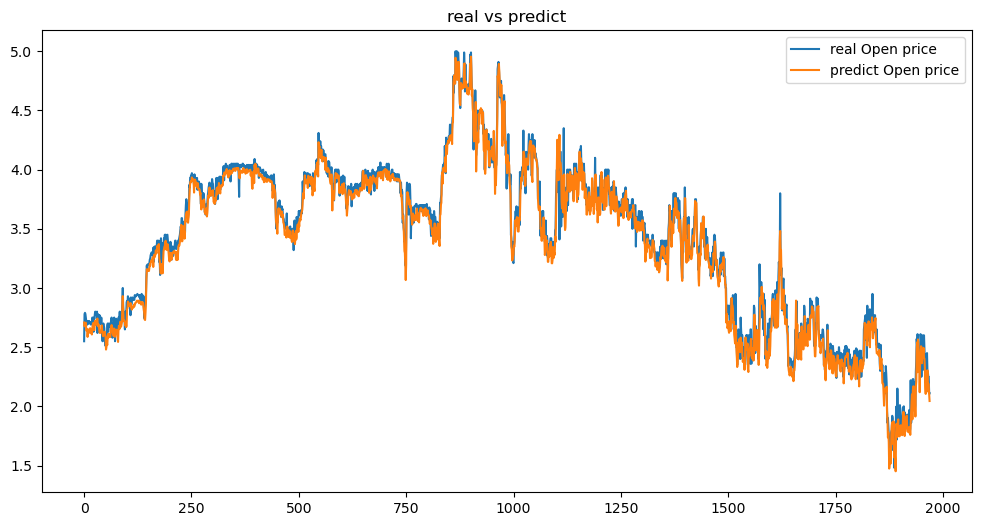

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv.flatten(), label='real Open price')
plt.plot(pred_inv.flatten(),   label='predict Open price')
plt.title("real vs predict")
plt.legend()
plt.show()